In [1]:
# ### Referred Chapter 2 from Hands on Machine Learning Book by Aurelien Geron (OREILLY)
# ##Getting Data
# 1. We start with importing libraries and data, here fresh data is loaded everytime the model is called.
# 2. transformed data into pandas

# ## Having a Look at structure and stats of Data
# 3. Understood few stats about the data- mean, median, mode, std dev., histogram, etc.

# ## Creating a Test Set
# 4. Created test set by spliting the dataset into 80:20 to eliminate snooping bias.
# 5. Snooping bias -  misusing data analysis to find patterns that can be presented as statistically significant
#     and increasing risk of false positive.
# 6. Used hashing and functions to check if updated test data after new arrival have 20% of new instances but do not
#     have any instances from previous training set.
    
# ## Visualizing Data
# 7. We used scatter plot with map type view.
# 8. Built a correlation plot to figure out importance between attributes.
# 9. Combined few attr to build a new attr and check whether the new attr is more correlated to our target values.

# ## Data Preprocessing
# 10. Preprocessed data to make it usable for our base model(Linear Regressor).
# 11. Preprocessing include cleaning data - removing or imputing missing and null values. Handling categorical values.

# ## Custom Transformers, Transformation Pipelines and Column Transformation
# 12. Built Transformers to perform task such as custom clean up and combining attributes, Feature Scaling etc.
# 13. A pipeline is created to perform above transformation in a sequential manner.
# 14. All pipelines are sent to ColumnTransformer class to transform all the required columns according to the
#     pipelines assigned.
    
# ## Selecting, Training and Fine tuning a model
# 15. Models such as Linear regressor, Decision Tree Regressor, Random Forest are selected and fed with fully 
#     transformed data. Predictions of all the models are evaluated with MSE and RMSE and the best model is 
#     selected for fine tuning steps.
# 16. Fine Tuning is performed on the best model yet. First the best model is evaluated with itself using 
#     Cross Validation technique. and then if upto the mark then Hyperparameter Tuning is performed on that Model.
# 17. There are Three methods by which we can tune HyperParameter.
#     1. Manually
#     2. GridSearchCV - best for less range of possible parameters. example(1,10,24,35,100)
#     3. RandomizedSearchCV - best for huge range of possible parameters. example(1,10000)
# 18. Best set of Hyperparamters are then carry forward and finalzed.

# ## Evaluating model on test set
# 19. All the transformations are performed on the test set also.
# 20. The test set is fitted with the final model with final hyperparameters.(not transformed) and model gives 
#     predictions for test set.
# 21. The predictions are compared and evaulated with actual values and if the model generalizes to new instances and
#     gives better or same performance then is deployed.
# 22. After deploying the model to real world, the performance of it must me checked on a daily or weekly basis and 
#     appropriate steps must be taken if performance decreases with new instances.

In [2]:
# Python ≥3.5 is required
import sys
# assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
# assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()
#columns and value type summary + number of non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()
# best for summary of categorical values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()
# numerical attributes summary(statistical)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


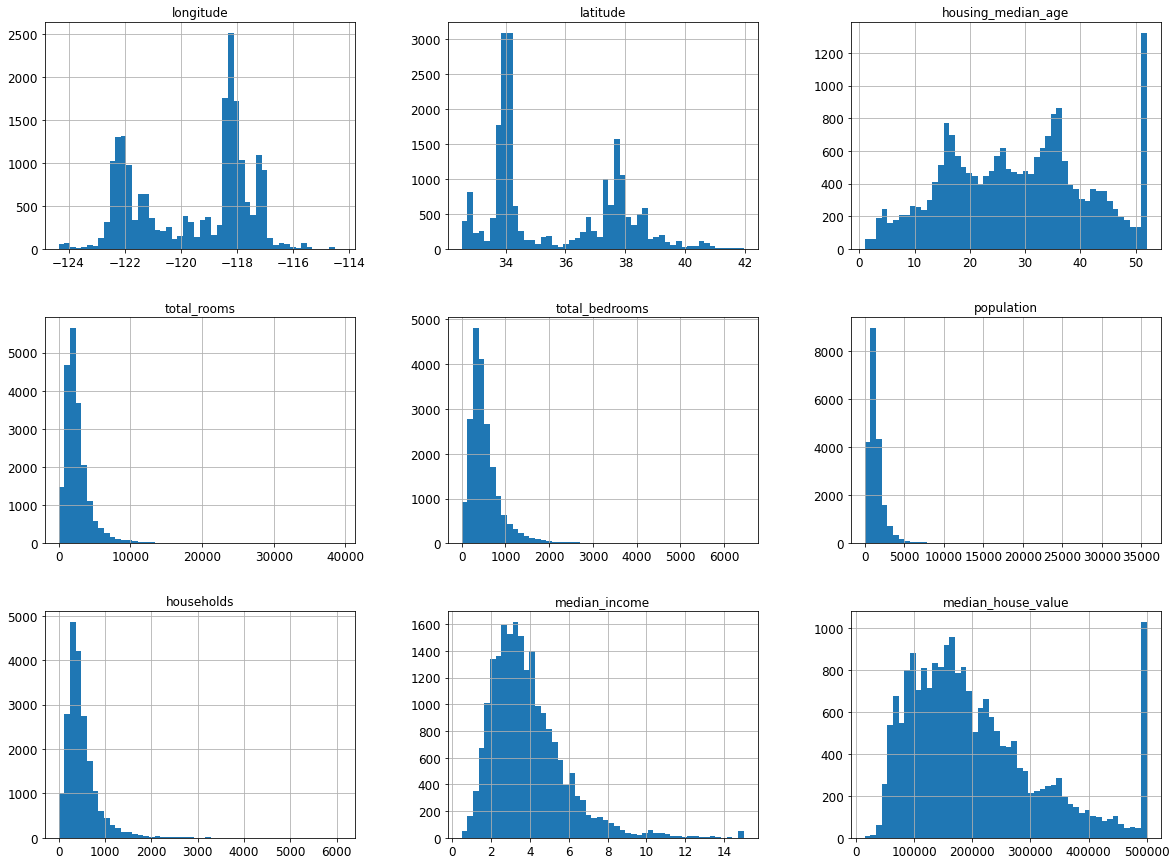

In [10]:
%matplotlib inline
import matplotlib.pyplot as plot 
housing.hist(bins=50, figsize=(20,15))
plt.show()#optional for jupyter notebooks

# Creating Test Set

In [11]:
np.random.seed(9)

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
#     print(shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

###### to eliminate snooping bias

In [15]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [16]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [17]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [19]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=9)

In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20558,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0,INLAND
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0,<1H OCEAN
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,NEAR OCEAN
14267,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0,NEAR OCEAN
3684,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0,<1H OCEAN


<AxesSubplot:>

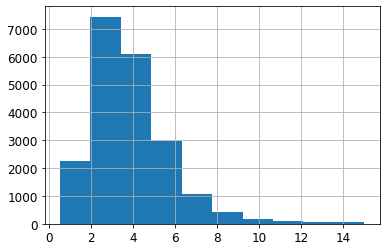

In [22]:
housing["median_income"].hist()

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

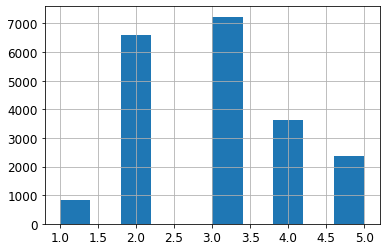

In [24]:
housing['income_cat'].hist()

In [25]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=9)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [28]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=9)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.039002,-2.068127,-0.243309
2,0.318847,0.318798,0.307655,-3.510105,-0.015195
3,0.350581,0.350533,0.356105,1.575456,-0.013820
4,0.176308,0.176357,0.186531,5.798296,0.027480
5,0.114438,0.114583,0.110707,-3.259949,0.127011


In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualize Data

In [32]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


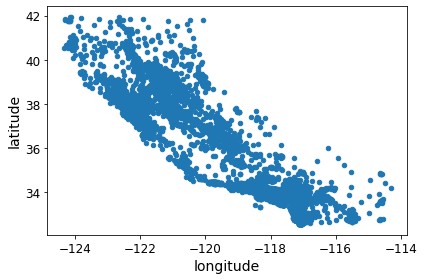

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


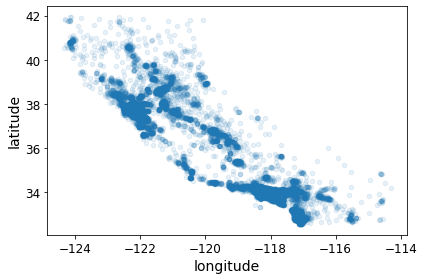

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


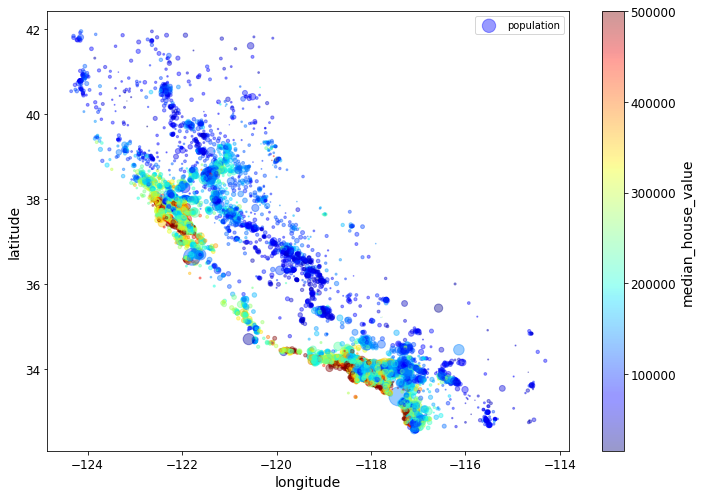

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [36]:
corr = housing.corr()

<AxesSubplot:>

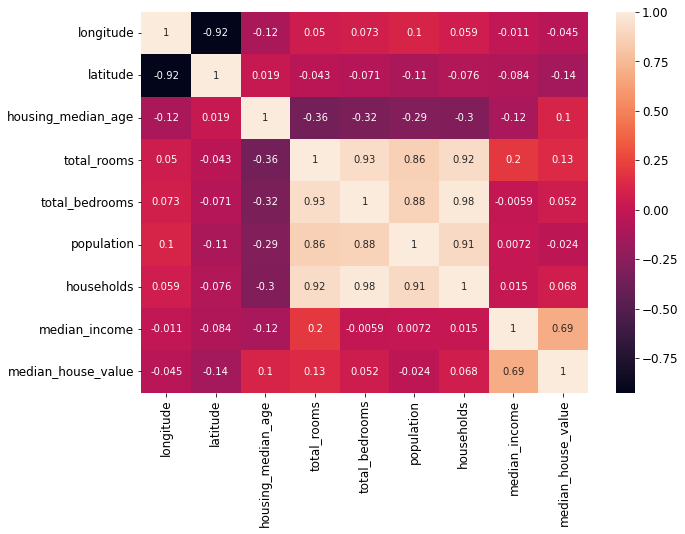

In [37]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot =True)

In [38]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f7c72bf57f0>)

Saving figure california_housing_prices_plot


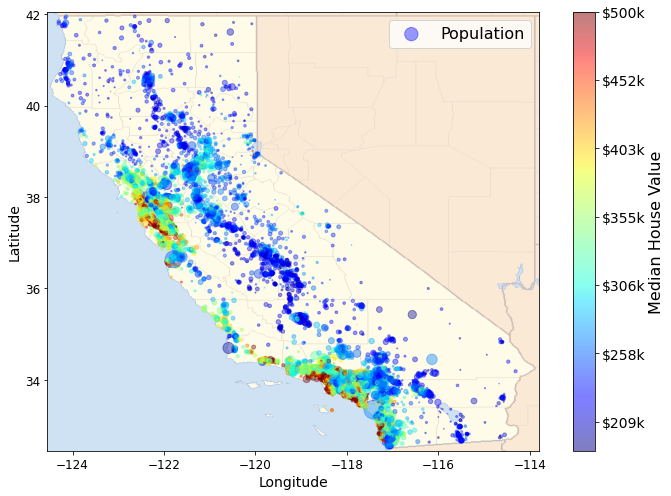

In [39]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

# Correlations

Saving figure scatter_matrix_plot


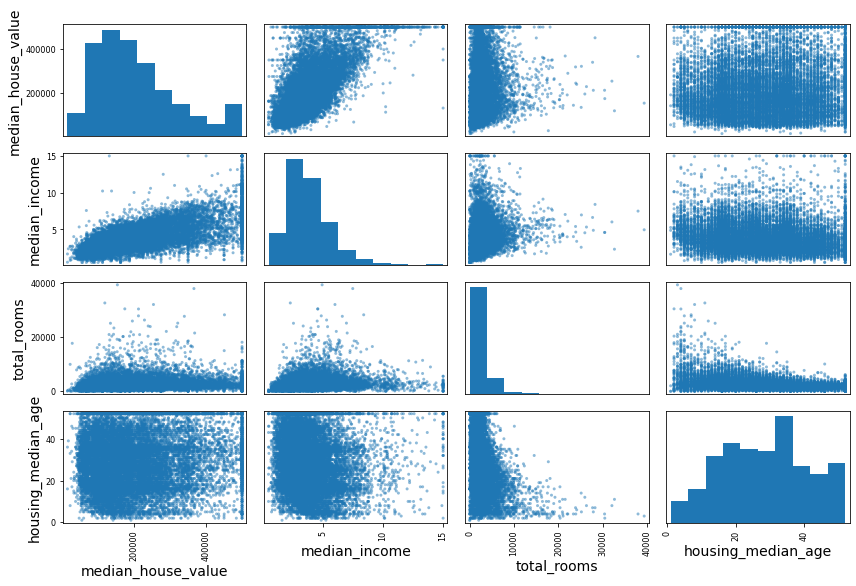

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


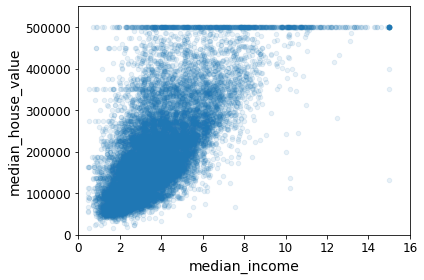

In [41]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

# Combinations of Attributes to form new features.

In [42]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

<AxesSubplot:>

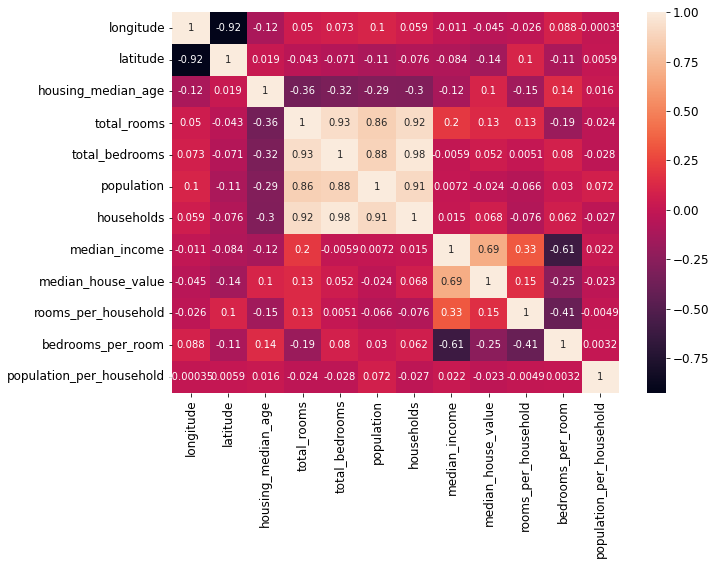

In [43]:
corr = housing.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot =True)

# Prepare Data for ML Algorithms

In [44]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Cleaning Data

In [45]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2323,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,INLAND
11449,-117.98,33.68,24.0,4177.0,NaN,1704.0,606.0,6.2473,<1H OCEAN
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
19959,-119.32,36.25,21.0,1231.0,NaN,609.0,206.0,2.8365,INLAND
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND


In [46]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [48]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [49]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_

array([-118.5  ,   34.26 ,   29.   , 2133.5  ,  435.   , 1164.5  ,
        409.   ,    3.536])

In [51]:
X = imputer.transform(housing_num)

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [53]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2323,-119.73,36.83,8.0,3602.0,435.0,1959.0,580.0,5.3478
11449,-117.98,33.68,24.0,4177.0,435.0,1704.0,606.0,6.2473
10761,-117.87,33.62,8.0,1266.0,435.0,375.0,183.0,9.8020
19959,-119.32,36.25,21.0,1231.0,435.0,609.0,206.0,2.8365
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812


In [54]:
imputer.strategy

'median'

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [56]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3321,-122.83,38.98,17.0,1383.0,347.0,719.0,296.0,1.6164
3929,-118.55,34.19,31.0,1856.0,370.0,990.0,360.0,4.3654
2275,-119.78,36.80,34.0,2200.0,493.0,1243.0,431.0,1.8514
17341,-120.40,34.86,11.0,1633.0,348.0,504.0,327.0,2.0508
18806,-121.55,40.48,14.0,2413.0,524.0,805.0,329.0,2.7857


## Categorical Features

In [57]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
3321,INLAND
3929,<1H OCEAN
2275,INLAND
17341,<1H OCEAN
18806,INLAND
3965,<1H OCEAN
16950,NEAR OCEAN
17440,NEAR OCEAN
7137,<1H OCEAN
8558,<1H OCEAN


In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [4.],
       [4.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [62]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [65]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [66]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
3321,-122.83,38.98,17.0,1383.0,347.0,719.0,296.0,1.6164,INLAND,4.672297,2.429054
3929,-118.55,34.19,31.0,1856.0,370.0,990.0,360.0,4.3654,<1H OCEAN,5.155556,2.75
2275,-119.78,36.8,34.0,2200.0,493.0,1243.0,431.0,1.8514,INLAND,5.104408,2.883991
17341,-120.4,34.86,11.0,1633.0,348.0,504.0,327.0,2.0508,<1H OCEAN,4.993884,1.541284
18806,-121.55,40.48,14.0,2413.0,524.0,805.0,329.0,2.7857,INLAND,7.334347,2.446809


# Transformation pipelines

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[-1.62113316,  1.56557284, -0.92367919, ..., -0.30377881,
        -0.05672682,  0.57335602],
       [ 0.51120802, -0.67909707,  0.18405156, ..., -0.10933173,
        -0.02899174, -0.2198971 ],
       [-0.10159096,  0.54399029,  0.42142243, ..., -0.12991167,
        -0.0174127 ,  0.16076094],
       ...,
       [-0.97844154,  1.33595107, -1.79403906, ...,  0.28967219,
        -0.04729912, -0.69301778],
       [ 0.61085014, -0.7775064 ,  0.34229881, ..., -0.49542861,
         0.02552391,  0.60845403],
       [ 1.24855965, -1.32578694, -1.08192644, ..., -0.00290626,
        -0.08443659, -0.19456009]])

## Column Transformer

In [69]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
housing_prepared

array([[-1.62113316,  1.56557284, -0.92367919, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51120802, -0.67909707,  0.18405156, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10159096,  0.54399029,  0.42142243, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.97844154,  1.33595107, -1.79403906, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61085014, -0.7775064 ,  0.34229881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.24855965, -1.32578694, -1.08192644, ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [73]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85507.1905668  246040.8299939   81836.66799898 180924.15820693
  62387.55578244]


In [74]:
print("Labels:", list(some_labels))

Labels: [77800.0, 223800.0, 66500.0, 275000.0, 77400.0]


In [75]:
some_data_prepared

array([[-1.62113316,  1.56557284, -0.92367919, -0.56975458, -0.44978147,
        -0.61410299, -0.52939784, -1.19184221, -0.30377881, -0.05672682,
         0.57335602,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.51120802, -0.67909707,  0.18405156, -0.35524493, -0.39543037,
        -0.37761054, -0.36311291,  0.2622875 , -0.10933173, -0.02899174,
        -0.2198971 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.10159096,  0.54399029,  0.42142243, -0.19923792, -0.10477015,
        -0.15682607, -0.17864056, -1.06753501, -0.12991167, -0.0174127 ,
         0.16076094,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.41048151, -0.36512446, -1.39842094, -0.45637739, -0.44741838,
        -0.80172615, -0.44885358, -0.96205904, -0.17438308, -0.13344494,
        -0.00829372,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.98342365,  2.26849661, -1

In [76]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68258.1585366108

In [77]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49354.60109212016

## Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [79]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine Tune Model

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72971.58779183 68333.33242284 68201.29852202 69805.14795191
 72668.29714014 73470.14650221 70460.35045748 70535.04104819
 67401.98234759 70549.02700038]
Mean: 70439.62111845867
Standard deviation: 1991.4764893926858


In [82]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [65504.22865164 67250.35529591 68833.83136481 68830.50525797
 66446.508886   74871.45136475 71982.75881732 67320.01942586
 67573.96327007 67796.57177921]
Mean: 68641.0194113539
Standard deviation: 2650.3699155120717


In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [84]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22237.175046795957

In [85]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51412.32752093 50659.00506143 49502.93449226 52343.12387701
 51266.5471557  54268.98032671 52378.02991917 54595.00462835
 49255.39949151 53691.21142827]
Mean: 51937.256390132745
Standard deviation: 1772.3864531234976


In [86]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68641.019411
std       2793.735192
min      65504.228652
25%      67267.771328
50%      67685.267525
75%      68832.999838
max      74871.451365
dtype: float64

In [87]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110577.647989759

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64028.63289913403 {'max_features': 2, 'n_estimators': 3}
54941.01691844261 {'max_features': 2, 'n_estimators': 10}
52926.87409461746 {'max_features': 2, 'n_estimators': 30}
60045.30490097304 {'max_features': 4, 'n_estimators': 3}
52694.33107725974 {'max_features': 4, 'n_estimators': 10}
50185.683311614026 {'max_features': 4, 'n_estimators': 30}
58453.4498200562 {'max_features': 6, 'n_estimators': 3}
51760.772089826045 {'max_features': 6, 'n_estimators': 10}
49933.30138991866 {'max_features': 6, 'n_estimators': 30}
58749.989988029774 {'max_features': 8, 'n_estimators': 3}
51783.46406259537 {'max_features': 8, 'n_estimators': 10}
49577.62682701658 {'max_features': 8, 'n_estimators': 30}
61890.23738760724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54339.76960621897 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59756.45288457475 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52853.266827479565 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [92]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044210,0.001018,0.002019,0.000103,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.942414e+09,-3.791910e+09,...,-4.099666e+09,2.680144e+08,18,-1.100880e+09,-1.023646e+09,-1.151503e+09,-1.101862e+09,-1.097129e+09,-1.095004e+09,4.091512e+07
1,0.146189,0.001055,0.006385,0.000345,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.907089e+09,-2.999181e+09,...,-3.018515e+09,1.074946e+08,11,-5.866493e+08,-5.898944e+08,-5.830163e+08,-5.552791e+08,-5.582709e+08,-5.746220e+08,1.476397e+07
2,0.438272,0.002518,0.018704,0.000069,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.776773e+09,-2.757627e+09,...,-2.801254e+09,3.719903e+07,9,-4.410426e+08,-4.354403e+08,-4.364862e+08,-4.197500e+08,-4.289573e+08,-4.323353e+08,7.382251e+06
3,0.073824,0.001272,0.002159,0.000127,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.423256e+09,-3.642677e+09,...,-3.605439e+09,1.192604e+08,16,-9.330303e+08,-9.529340e+08,-9.458570e+08,-9.512037e+08,-9.476145e+08,-9.461279e+08,7.013091e+06
4,0.241888,0.001655,0.006498,0.000107,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.708370e+09,-2.791080e+09,...,-2.776693e+09,3.717445e+07,7,-5.025752e+08,-5.149382e+08,-4.978787e+08,-4.978595e+08,-5.066587e+08,-5.039821e+08,6.386222e+06
5,0.724057,0.002939,0.018917,0.000077,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.451733e+09,-2.495754e+09,...,-2.518603e+09,4.415525e+07,3,-3.863666e+08,-3.924270e+08,-3.792153e+08,-3.899976e+08,-3.887384e+08,-3.873490e+08,4.513415e+06
6,0.100237,0.001334,0.001932,0.000017,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.421130e+09,-3.471884e+09,...,-3.416806e+09,6.779623e+07,13,-9.509572e+08,-9.467353e+08,-9.213464e+08,-8.705096e+08,-9.213927e+08,-9.221882e+08,2.864344e+07
7,0.332638,0.001871,0.006155,0.000047,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.579433e+09,-2.677586e+09,...,-2.679178e+09,7.387763e+07,5,-4.986079e+08,-5.098695e+08,-4.914948e+08,-4.687396e+08,-4.848984e+08,-4.907220e+08,1.375903e+07
8,1.009195,0.002730,0.019116,0.000598,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.403834e+09,-2.486825e+09,...,-2.493335e+09,5.671536e+07,2,-3.844879e+08,-3.902324e+08,-3.787581e+08,-3.794236e+08,-3.827594e+08,-3.831323e+08,4.129823e+06
9,0.130832,0.002062,0.002229,0.000105,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.455769e+09,-3.414844e+09,...,-3.451561e+09,1.138308e+08,14,-9.386002e+08,-9.492711e+08,-8.780240e+08,-8.667094e+08,-9.267387e+08,-9.118687e+08,3.322486e+07


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
#njobs = 5
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7c74bcaca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7c74bca850>},
                   random_state=42, scoring='neg_mean_squared_error')

In [94]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48905.61424453076 {'max_features': 7, 'n_estimators': 180}
51421.13351737534 {'max_features': 5, 'n_estimators': 15}
50343.35606442732 {'max_features': 3, 'n_estimators': 72}
50706.88693512657 {'max_features': 5, 'n_estimators': 21}
49091.236562882164 {'max_features': 7, 'n_estimators': 122}
50354.74992519929 {'max_features': 3, 'n_estimators': 75}
50220.78587607579 {'max_features': 3, 'n_estimators': 88}
49450.48886178487 {'max_features': 5, 'n_estimators': 100}
50070.97374088372 {'max_features': 3, 'n_estimators': 150}
64998.856619825805 {'max_features': 5, 'n_estimators': 2}


In [95]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.91685122e-02, 6.21544853e-02, 4.34010424e-02, 1.48454921e-02,
       1.50325571e-02, 1.58322834e-02, 1.40851432e-02, 3.68415472e-01,
       5.61459133e-02, 1.09186226e-01, 5.35237880e-02, 6.96940267e-03,
       1.65536127e-01, 2.27964084e-04, 1.63557733e-03, 3.84001307e-03])

In [96]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36841547248249906, 'median_income'),
 (0.16553612717412491, 'INLAND'),
 (0.10918622626674389, 'pop_per_hhold'),
 (0.06916851216030301, 'longitude'),
 (0.06215448529789891, 'latitude'),
 (0.0561459133250977, 'rooms_per_hhold'),
 (0.053523788006757625, 'bedrooms_per_room'),
 (0.043401042388521084, 'housing_median_age'),
 (0.015832283357797856, 'population'),
 (0.01503255713497828, 'total_bedrooms'),
 (0.014845492092350188, 'total_rooms'),
 (0.014085143155609377, 'households'),
 (0.006969402671252573, '<1H OCEAN'),
 (0.0038400130679260834, 'NEAR OCEAN'),
 (0.0016355773340558147, 'NEAR BAY'),
 (0.00022796408408373305, 'ISLAND')]

In [97]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [98]:
final_rmse

48864.87757977864

In [99]:
from scipy import stats

In [100]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([46583.42525668, 51044.46114054])

In [101]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46584.11073639679, 51043.83555996357)

In [102]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import expon, reciprocal

# # see https://docs.scipy.org/doc/scipy/reference/stats.html
# # for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# # Note: gamma is ignored when kernel is "linear"
# param_distribs = {
#         'kernel': ['linear', 'rbf'],
#         'C': reciprocal(20, 200000),
#         'gamma': expon(scale=1.0),
#     }

# svm_reg = SVR()
# rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
#                                 n_iter=50, cv=5, scoring='neg_mean_squared_error',
#                                 verbose=2, n_jobs=4, random_state=42)
# rnd_search.fit(housing_prepared, housing_labels)
# from scipy.stats import geom, expon
# geom_distrib=geom(0.5).rvs(10000, random_state=42)
# expon_distrib=expon(scale=1).rvs(10000, random_state=42)
# plt.hist(geom_distrib, bins=50)
# plt.show()
# plt.hist(expon_distrib, bins=50)
# plt.show()